In [62]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 

# --- read data ---- 
df = pd.read_csv('datasets/Droughts_satelite_and_events.csv')
districts_with_droughts = pd.read_csv('datasets/districts_with_droughts_Uganda_Kenya.csv')
df.head()

,Country,District,year,month,day,date,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar
0,Uganda,ABIM,2000,3,1,2000-03-01,0.270712,0.137156,0.031873,5.285528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,Uganda,ABIM,2000,4,1,2000-04-01,0.368438,0.184616,0.172345,84.424662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2,Uganda,ABIM,2000,5,1,2000-05-01,0.624764,0.365380,0.185952,100.613865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,Uganda,ABIM,2000,6,1,2000-06-01,0.669868,0.416891,0.205662,91.973897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,Uganda,ABIM,2000,7,1,2000-07-01,0.717746,0.458402,0.157562,67.037938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


# Do seasons matter? 
Let's see how many of the reported events occur within Uganda's known dry seasons

## Uganda 

dry seasons: 
* from December through February
* from June through July 

wet seasons: 
* from September through November 
* from March through May 

dry seasons shown in blue
wet seasons shown in red

 

drought events reported for Uganda
# events in wet seasons:  92
# events in dry seasons:  1199
92.87374128582493 % of all reported events occur in the dry seasons (Uganda)


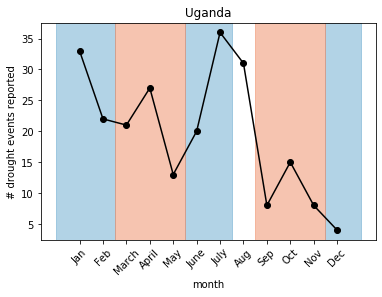

In [5]:
Uganda = df[df['Country']=='Uganda'] 
drought_events = Uganda[Uganda['drought_reported']]
month_of_event = []
for date in pd.to_datetime(drought_events['date']):
    month_of_event.append( date.month )
month_of_event = np.array(month_of_event)
    
# -- Uganda's seasons --- 
dry_season_1 = [12,2]
dry_season_2 = [6,7]
wet_season_1  = [9,11]
wet_season_2  = [3,5]


plt.axvspan(dry_season_1[0]-0.5, 13, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(0,dry_season_1[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)

plt.axvspan(dry_season_2[0]-0.5, dry_season_2[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)

plt.axvspan(wet_season_1[0]-0.5, wet_season_1[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)
plt.axvspan(wet_season_2[0]-0.5, wet_season_2[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)


# plt.hist(month_of_event, bins=[i-0.5 for i in range(14)], color='black',histtype='step');
counts, bins = np.histogram(month_of_event,bins=[i-0.5 for i in range(1,14)])
plt.plot(range(1,13), counts, marker='o',color='black')
plt.xlabel('month');
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.ylabel('# drought events reported');
plt.title('Uganda');
print('dry seasons shown in blue')
print('wet seasons shown in red')
print('\n \n')





# --- fraction of events within the dry seasons ---- 
events_in_wet_seasons = np.sum( (month_of_event <= wet_season_1[1])&(month_of_event >= wet_season_1[0])  )
events_in_wet_seasons += np.sum( (month_of_event <= wet_season_2[1])&(month_of_event >= wet_season_2[0])  )

events_in_dry_seasons = np.sum(month_of_event) - events_in_wet_seasons
print('drought events reported for Uganda')
print('# events in wet seasons: ', events_in_wet_seasons)
print('# events in dry seasons: ', events_in_dry_seasons)
print((events_in_dry_seasons/(events_in_dry_seasons+events_in_wet_seasons))*100, '% of all reported events occur in the dry seasons (Uganda)')


## Kenya

dry seasons: 
* from June through October
* from December through March 

wet seasons: 
* end of October until December (essentially November) 
* from April through May  

dry seasons shown in blue
wet seasons shown in red

 

drought events reported for Kenya
# events in wet seasons:  28
# events in dry seasons:  545
95.11343804537522 % of all reported events occur in the dry seasons (Uganda)


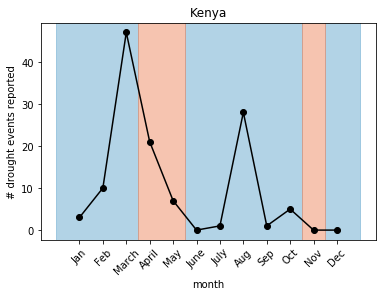

In [6]:
Kenya = df[df['Country']=='Kenya'] 
drought_events = Kenya[Kenya['drought_reported']]
month_of_event = []
for date in pd.to_datetime(drought_events['date']):
    month_of_event.append( date.month )
month_of_event = np.array(month_of_event)
    
# -- Kenya's seasons --- 
dry_season_1 = [12,3]
dry_season_2 = [6,10]
wet_season_1  = [11,11]
wet_season_2  = [4,5]

plt.axvspan(dry_season_1[0]-0.5, 13, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(0,dry_season_1[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(dry_season_2[0]-0.5, dry_season_2[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(wet_season_1[0]-0.5, wet_season_1[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)
plt.axvspan(wet_season_2[0]-0.5, wet_season_2[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)


# plt.hist(month_of_event, bins=[i-0.5 for i in range(14)], color='black',histtype='step');
counts, bins = np.histogram(month_of_event,bins=[i-0.5 for i in range(1,14)])
plt.plot(range(1,13), counts, marker='o',color='black')
plt.xlabel('month');
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.ylabel('# drought events reported');
plt.title('Kenya');
print('dry seasons shown in blue')
print('wet seasons shown in red')
print('\n \n')






# --- fraction of events within the dry seasons ---- 
events_in_wet_seasons = np.sum( (month_of_event <= wet_season_1[1])&(month_of_event >= wet_season_1[0])  )
events_in_wet_seasons += np.sum( (month_of_event <= wet_season_2[1])&(month_of_event >= wet_season_2[0])  )

events_in_dry_seasons = np.sum(month_of_event) - events_in_wet_seasons
print('drought events reported for Kenya')
print('# events in wet seasons: ', events_in_wet_seasons)
print('# events in dry seasons: ', events_in_dry_seasons)
print((events_in_dry_seasons/(events_in_dry_seasons+events_in_wet_seasons))*100, '% of all reported events occur in the dry seasons (Uganda)')


In conclusion: It certainly makes sense to not normalize based on the time of year, as the seasonal trends seem to actually hold predictive value 

# Use Z-norm to compare different districts and types of data  

In [57]:
from sklearn.preprocessing import StandardScaler
Znorm = StandardScaler()




non_features = ['drought_reported','drought_news_article','drought_desinventar',
                                'date','day','month','year','District','Country',
                                  'SPEI_1month',
                                 'SPEI_2month',
                                 'SPEI_3month',
                                 'SPEI_4month',
                                 'SPEI_5month',
                                 'SPEI_6month',
                                 'SPEI_7month',
                                 'SPEI_8month',
                                 'SPEI_9month',
                                 'SPEI_10month',
                                 'SPEI_11month',
                                 'SPEI_12month']

features = list( df.columns.drop(non_features) )


normed_by_district = pd.DataFrame()

for district in df['District'].unique():
    # -- filter by district --
    group = df[df['District']==district].reset_index()  
    satelite_data = group[features]
# satelite_data.head()
    Znorm.fit(satelite_data)
    normed_satelite_data = pd.DataFrame(Znorm.transform(satelite_data),  columns=features)
    normed_satelite_data[non_features] = group[non_features]
    
    
    normed_by_district = pd.concat([normed_by_district, normed_satelite_data], ignore_index=True)
    
    
    
    
# normed_by_district.head()
normed_by_district.to_csv('datasets/Droughts_satelite_and_events_Znormed.csv', index=False)

# Correlation of events with satelite data 

/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until 

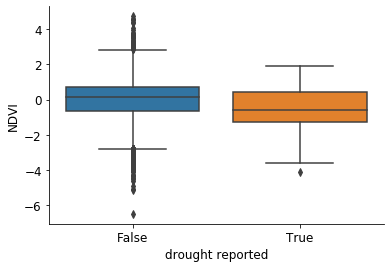

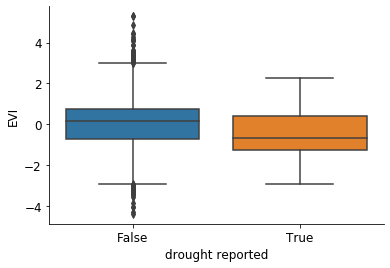

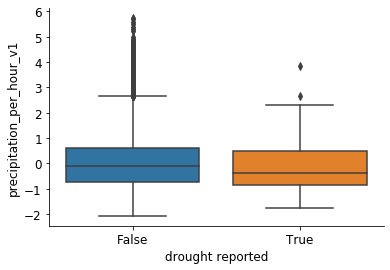

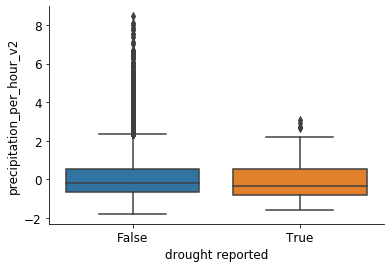

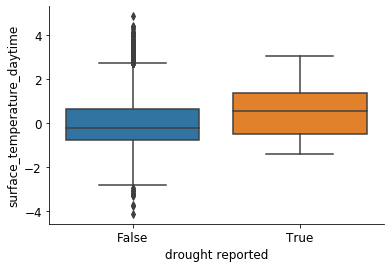

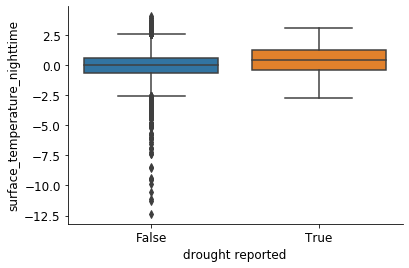

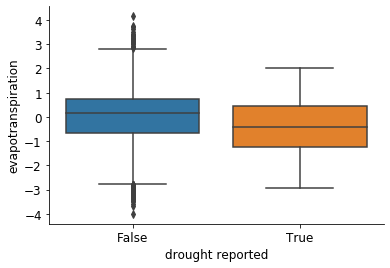

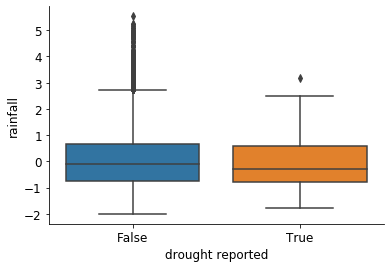

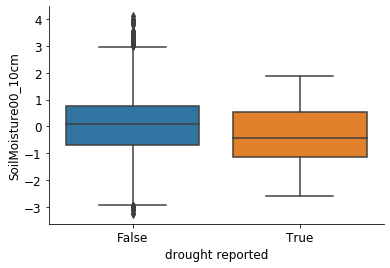

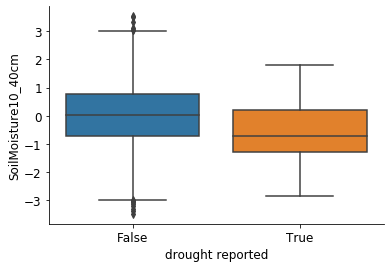

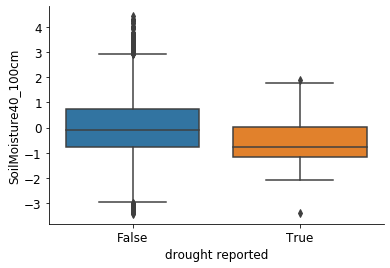

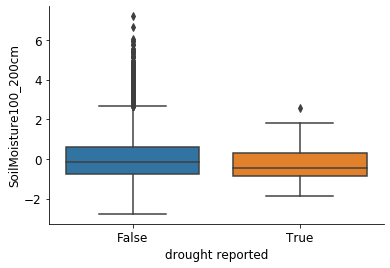

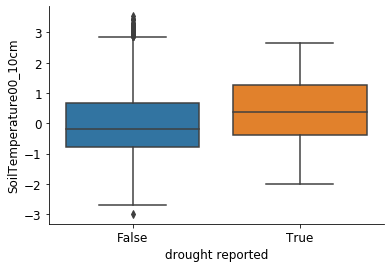

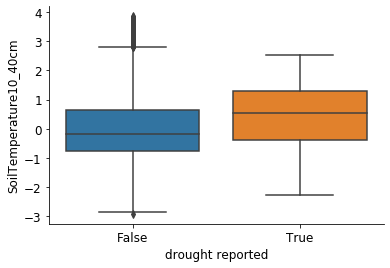

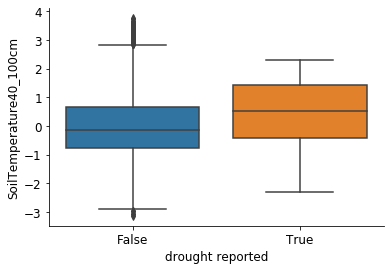

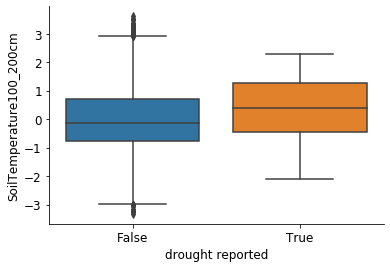

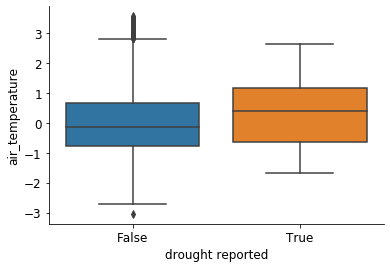

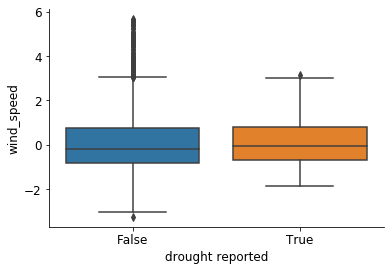

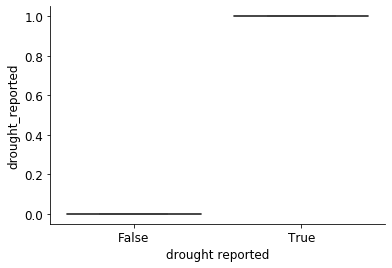

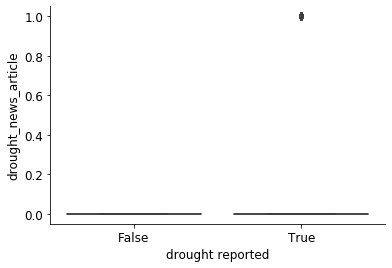

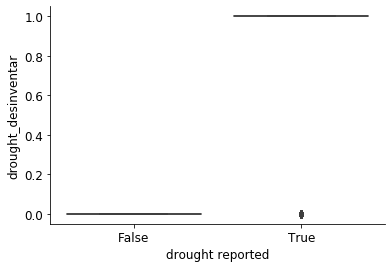

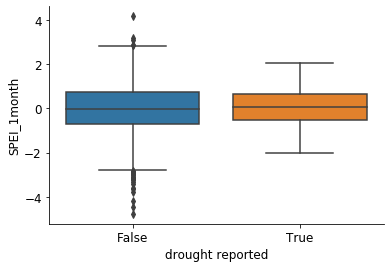

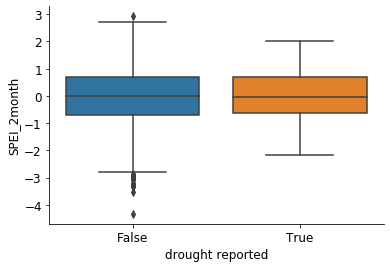

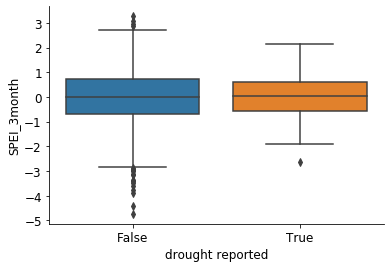

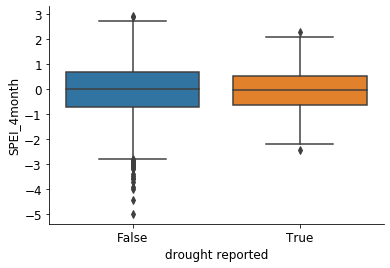

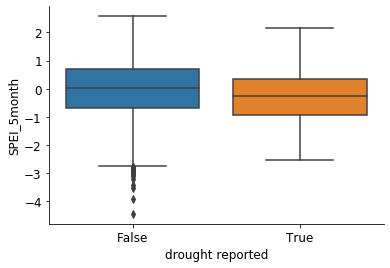

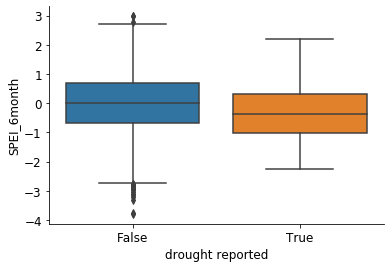

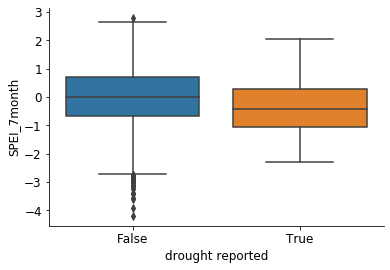

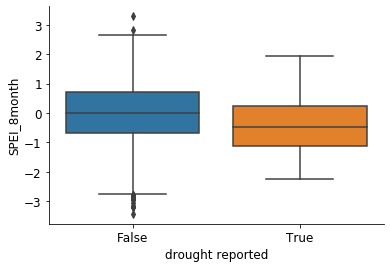

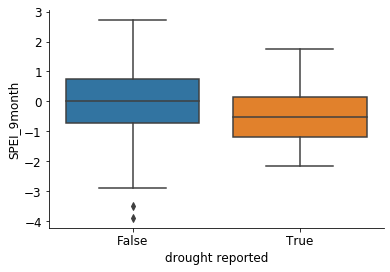

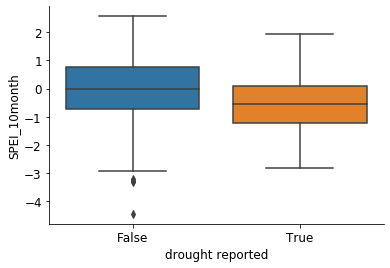

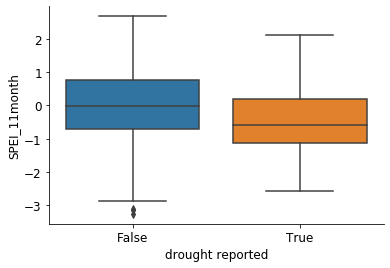

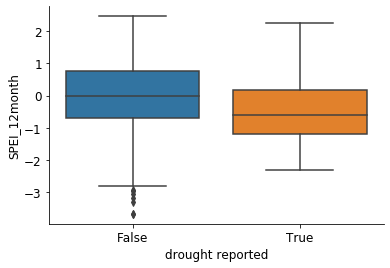

In [65]:
indicators = list(normed_by_district.columns.drop(['Country','District','date','day','month','year']))

for var in indicators:
    plt.figure()
    sns.boxplot(x='drought_reported',y=var,data=normed_by_district);
    plt.xlabel('drought reported', fontsize=12,color='black')
    plt.ylabel(var, fontsize=12, color="black")
    plt.xticks(rotation=0,fontsize=12, color="black")
    plt.yticks(fontsize=12, color="black");
    sns.despine();